In [6]:
import pandas as pd

# Always display all the columns
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60) 

dataset = pd.read_csv("E:/project/Correlation Exercise/house_data.csv")# read the dataset

dataset.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
dataset.dtypes # get an overview of data types presented in the dataset

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [8]:
print(dataset.isnull().any()) # Looking for NaN values

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool


In [9]:
# let's observe unique values presented in potentially categorical columns
print("bedrooms")
print(sorted(dataset.bedrooms.unique()))
print("bathrooms")
print(sorted(dataset.bathrooms.unique()))
print("floors")
print(sorted(dataset.floors.unique()))
print("waterfront")
print(sorted(dataset.waterfront.unique()))
print("view")
print(sorted(dataset.view.unique()))
print("condition")
print(sorted(dataset.condition.unique()))
print("grade")
print(sorted(dataset.grade.unique()))

bedrooms
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 33]
bathrooms
[0.0, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0, 5.25, 5.5, 5.75, 6.0, 6.25, 6.5, 6.75, 7.5, 7.75, 8.0]
floors
[1.0, 1.5, 2.0, 2.5, 3.0, 3.5]
waterfront
[0, 1]
view
[0, 1, 2, 3, 4]
condition
[1, 2, 3, 4, 5]
grade
[1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


In [11]:
# Create new categorical variables
dataset['waterfront'] = pd.Categorical(dataset['waterfront'], ordered=True)
dataset['view'] = pd.Categorical(dataset['view'], ordered=True)
dataset['condition'] = pd.Categorical(dataset['condition'], ordered=True)

# Remove unused variables
dataset = dataset.drop(['id', 'date'],axis=1)

dataset.dtypes # re-check data types in the dataset after conversion above

price             float64
bedrooms            int64
bathrooms         float64
sqft_living         int64
sqft_lot            int64
floors            float64
waterfront       category
view             category
condition        category
grade               int64
sqft_above          int64
sqft_basement       int64
yr_built            int64
yr_renovated        int64
zipcode             int64
lat               float64
long              float64
sqft_living15       int64
sqft_lot15          int64
dtype: object

In [14]:
# We need to introduce two new categorical variables for this purpose:
dataset['basement_is_present'] = dataset['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)
dataset['basement_is_present'] = dataset['basement_is_present'].astype('category')


dataset['is_renovated'] = dataset['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)
dataset['is_renovated'] = dataset['is_renovated'].astype('category')

# Display updated data types
dataset.dtypes


price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront             category
view                   category
condition              category
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
basement_is_present    category
is_renovated           category
dtype: object

In [15]:
from scipy import stats

CATEGORICAL_VARIABLES = ["waterfront", 
                       "basement_is_present", 
                       "is_renovated", 
                       "bedrooms", 
                       "bathrooms", 
                       "floors", 
                       "view", 
                       "condition",
                       "grade"]

for c in CATEGORICAL_VARIABLES:
    if c not in ["waterfront", "basement_is_present", "is_renovated"]:
        correlation = stats.pearsonr(dataset[c], dataset["price"])
    else:
        correlation = stats.pointbiserialr(dataset[c], dataset["price"])
    print("Correlation of %s to price is %s" %(c, correlation))

Correlation of waterfront to price is SignificanceResult(statistic=0.2663694340306021, pvalue=0.0)
Correlation of basement_is_present to price is SignificanceResult(statistic=0.1802300866502102, pvalue=3.256778736240732e-157)
Correlation of is_renovated to price is SignificanceResult(statistic=0.12609226271139484, pvalue=2.6401485918061627e-77)
Correlation of bedrooms to price is PearsonRResult(statistic=0.3083495981456382, pvalue=0.0)
Correlation of bathrooms to price is PearsonRResult(statistic=0.5251375054139618, pvalue=0.0)
Correlation of floors to price is PearsonRResult(statistic=0.2567938875507184, pvalue=1.6e-322)
Correlation of view to price is PearsonRResult(statistic=0.3972934882945042, pvalue=0.0)
Correlation of condition to price is PearsonRResult(statistic=0.036361789128997554, pvalue=8.93565406245874e-08)
Correlation of grade to price is PearsonRResult(statistic=0.6674342560202369, pvalue=0.0)


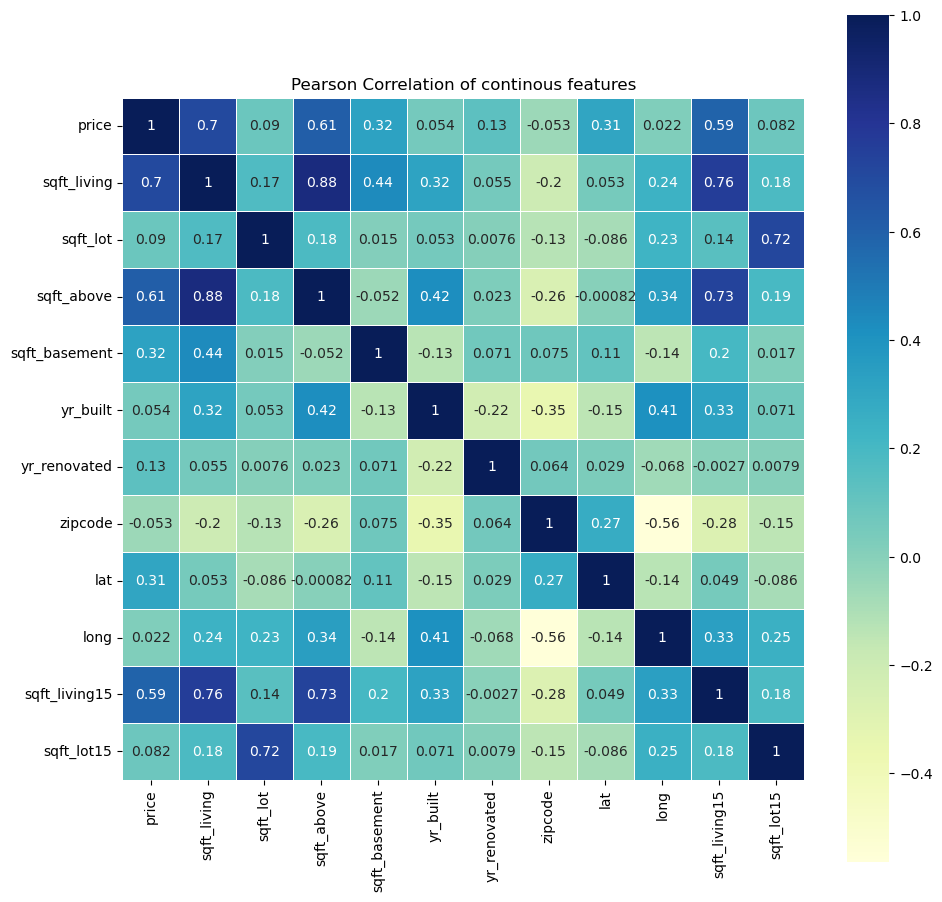

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

CONTINUOUS_VARIABLES = ["price", 
                       "sqft_living", 
                       "sqft_lot", 
                       "sqft_above", 
                       "sqft_basement", 
                       "yr_built", 
                       "yr_renovated", 
                       "zipcode",
                       "lat",
                       "long",
                       "sqft_living15",
                       "sqft_lot15"]

# create new dataframe containing only continuous variables
cont_variables_dataframe = dataset[CONTINUOUS_VARIABLES]
# calculate correlation for all continuous variables
cont_variables_correlation = cont_variables_dataframe.corr()

# plot the heatmap showing calculated correlations
plt.subplots(figsize=(11, 11))
plt.title('Pearson Correlation of continous features')
ax = sns.heatmap(cont_variables_correlation, 
                 annot=True, 
                 linewidths=.5, 
                 cmap="YlGnBu",
                 square=True
                );